## This notebook is developed as part of the Applied Data Science: Capstone Project. We analyse the Neighborhoods in London, focussing on the City of London.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy
# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries imported.')

Libraries imported.


In [2]:
# Read data from the URL provided
London_Boroughs = pd.read_html("https://en.wikipedia.org/wiki/List_of_London_boroughs") 

In [3]:
London_Boroughs[1]

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population(2011 est),Co-ordinates,Nr. inmap
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


In [4]:
London_Boroughs[0]

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [5]:
London_Boroughs[1]["Co-ordinates"]

0    51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W
Name: Co-ordinates, dtype: object

In [6]:
def get_lat_lon_trial(coordinates):
    print("Coordinates received: ", coordinates)
    location = coordinates[28:]
    location = location.strip()
    Latitude = float(location[1:8])
    Longitude = float(location[11:17])
    if (location[18] == 'W'):
        Longitude *= -1
        return Latitude, Longitude
    return Latitude, Longitude

In [7]:
df_London_Boroughs = pd.DataFrame()
df_London_Boroughs = pd.concat([London_Boroughs[1], London_Boroughs[0]], ignore_index = True)

df_London_Boroughs.head(10)

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population(2011 est),Co-ordinates,Nr. inmap,Population (2013 est)[1],Nr. in map
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000.0,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1.0,NaN,NaN
1,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,NaN,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,NaN,194352.0,25.0
2,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,NaN,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,NaN,369088.0,31.0
3,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,NaN,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,NaN,236687.0,23.0
4,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,NaN,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,NaN,317264.0,12.0
5,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,NaN,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,NaN,317899.0,20.0
6,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,NaN,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,NaN,229719.0,11.0
7,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,NaN,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,NaN,372752.0,19.0
8,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,NaN,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,NaN,342494.0,13.0
9,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,NaN,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,NaN,320524.0,30.0


In [8]:
df_London_Boroughs.columns

Index(['Borough', 'Inner', 'Status', 'Local authority', 'Political control',
       'Headquarters', 'Area (sq mi)', 'Population(2011 est)', 'Co-ordinates',
       'Nr. inmap', 'Population (2013 est)[1]', 'Nr. in map'],
      dtype='object')

In [9]:
df_London_Boroughs.drop(['Inner', 'Status','Political control', 'Headquarters', 'Area (sq mi)', 'Population(2011 est)', 'Nr. inmap', 'Population (2013 est)[1]', 'Nr. in map'], axis = 1, inplace = True)
df_London_Boroughs.head(5)

,Borough,Local authority,Co-ordinates
0,City of London,Corporation of London;Inner Temple;Middle Temple,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W
1,Barking and Dagenham [note 1],Barking and Dagenham London Borough Council,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
2,Barnet,Barnet London Borough Council,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
3,Bexley,Bexley London Borough Council,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
4,Brent,Brent London Borough Council,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W


In [10]:
df_London_Boroughs.dropna(subset=["Co-ordinates"], axis = 0, inplace =True)
df_London_Boroughs.shape

(33, 3)

In [11]:
column_names = ['Borough','Latitude', 'Longitude', 'Co-ordinates'] 
df_Map_of_London = pd.DataFrame(columns=column_names)

In [12]:
def get_lat_lon(coordinates):
    coordinates = coordinates.split("/")
   # print("Coordinates received: ", coordinates.split("/"))
    location = coordinates[1][1:]
    #location = location.strip()
   # print("Location", location)
    Latitude = float(location[1:8])
    Longitude = float(location[11:17])
    if (location[18] == 'W'):
        Longitude *= -1
        return Latitude, Longitude
    return Latitude, Longitude

In [13]:
df_Map_of_London["Borough"] = df_London_Boroughs["Borough"]
df_Map_of_London["Co-ordinates"] = df_London_Boroughs["Co-ordinates"]
for index in df_Map_of_London.index:
    #print("Coordinates Sent :", df_Map_of_London["Co-ordinates"][index])
    df_Map_of_London["Latitude"][index], df_Map_of_London["Longitude"][index] = get_lat_lon(df_Map_of_London["Co-ordinates"][index])
df_Map_of_London.head()

,Borough,Latitude,Longitude,Co-ordinates
0,City of London,51.5155,-0.0922,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W
1,Barking and Dagenham [note 1],51.5607,0.1557,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
2,Barnet,51.6252,-0.1517,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
3,Bexley,51.4549,0.1505,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
4,Brent,51.5588,-0.2817,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W


In [14]:
#Use geopy library to get the latitude and longitude values of London, UK

address = 'London, UK'

geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [15]:
# create map of London using latitude and longitude values
f = folium.Figure(width=800, height=400)
map_london = folium.Map(location=[latitude, longitude], zoom_start=11).add_to(f)

# add markers to map
for lat, lng, borough in zip(df_Map_of_London['Latitude'], df_Map_of_London['Longitude'],df_Map_of_London['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

It should be noted that the DataFrame used to develop the above map doesnt include the postcodes. As we getinto greater detail we zoom into City of London and City of Westminster. We need to remake a data frame that focuses just on these areas. We will require getting the postcode districts as well as latitide and longitude.

In [16]:
# identify the post codes that provide coverage for City of London and Westminster

postcodeEC = pd.read_html("https://en.wikipedia.org/wiki/EC_postcode_area")
postcodeWC = pd.read_html("https://en.wikipedia.org/wiki/WC_postcode_area")
postcodeE = pd.read_html("https://en.wikipedia.org/wiki/E_postcode_area")
postcodeSE = pd.read_html("https://en.wikipedia.org/wiki/SE_postcode_area")
postcodeNW = pd.read_html("https://en.wikipedia.org/wiki/NW_postcode_area")
postcodeSW = pd.read_html("https://en.wikipedia.org/wiki/SW_postcode_area")
postcodeW = pd.read_html("https://en.wikipedia.org/wiki/W_postcode_area")

In [17]:
df_CentralLondon = pd.DataFrame()
df_CentralLondon = pd.concat([postcodeEC[1], postcodeWC[1], postcodeE[1], postcodeSE[1], postcodeNW[1], postcodeSW[1], postcodeW[1]], ignore_index = True)

df_CentralLondon.head(10)

,Postcode district,Post town,Coverage,Local authority area
0,EC1A,LONDON,St Bartholomew's Hospital,"City of London, Islington"
1,EC1M,LONDON,"Clerkenwell, Farringdon","Islington, Camden, City of London"
2,EC1N,LONDON,Hatton Garden,"Camden, City of London"
3,EC1P,LONDON,NaN,non-geographic
4,EC1R,LONDON,"Finsbury, Finsbury Estate (west)","Islington, Camden"
5,EC1V,LONDON,"Finsbury (east), Moorfields Eye Hospital","Islington, Hackney"
6,EC1Y,LONDON,"St Luke's, Bunhill Fields","Islington, City of London"
7,EC2A,LONDON,Shoreditch,"Islington, Hackney, City of London"
8,EC2M,LONDON,"Broadgate, Liverpool Street",Tower Hamlets
9,EC2N,LONDON,"Old Broad Street, Tower 42",City of London


In [18]:
df_CentralLondon.dropna(subset = ['Coverage'], axis=0, inplace=True)
df_CentralLondon.shape

(153, 4)

In [19]:
# Setup the final result data frame in the right format
column_names = ['Postcode', 'Borough','Neighborhood']

df_London_Westminster = pd.DataFrame(columns=column_names)
df_London_Westminster

,Postcode,Borough,Neighborhood


In [20]:
# Populate the database
df_London_Westminster['Postcode'] = df_CentralLondon['Postcode district']
df_London_Westminster['Borough'] = df_CentralLondon['Local authority area']
df_London_Westminster['Neighborhood'] = df_CentralLondon['Coverage']
df_London_Westminster.head(5)

,Postcode,Borough,Neighborhood
0,EC1A,"City of London, Islington",St Bartholomew's Hospital
1,EC1M,"Islington, Camden, City of London","Clerkenwell, Farringdon"
2,EC1N,"Camden, City of London",Hatton Garden
4,EC1R,"Islington, Camden","Finsbury, Finsbury Estate (west)"
5,EC1V,"Islington, Hackney","Finsbury (east), Moorfields Eye Hospital"


In [21]:
print("Having processed the data as required, the shape of the DataFrame is ", df_London_Westminster.shape)

Having processed the data as required, the shape of the DataFrame is  (153, 3)


In [22]:
# Adding columns to read Latutute and Longitute
df_London_Westminster.insert(3 , 'Latitute', np.nan)
df_London_Westminster.insert(4 , 'Longitute', np.nan)
df_London_Westminster.head(5)

,Postcode,Borough,Neighborhood,Latitute,Longitute
0,EC1A,"City of London, Islington",St Bartholomew's Hospital,NaN,NaN
1,EC1M,"Islington, Camden, City of London","Clerkenwell, Farringdon",NaN,NaN
2,EC1N,"Camden, City of London",Hatton Garden,NaN,NaN
4,EC1R,"Islington, Camden","Finsbury, Finsbury Estate (west)",NaN,NaN
5,EC1V,"Islington, Hackney","Finsbury (east), Moorfields Eye Hospital",NaN,NaN


In [23]:
df_London_Westminster_temp = df_London_Westminster[df_London_Westminster['Borough'].str.contains(("City of London"), na=False)].reset_index(drop=True)
df_London_Westminster_temp.shape

#df_London_Westminster.shape


(24, 5)

In [24]:
df_London_Westminster_temp_1 = df_London_Westminster[df_London_Westminster['Borough'].str.contains(("Westminster"), na=False)].reset_index(drop=True)
df_London_Westminster_temp_1.shape

(35, 5)

In [25]:
df_London_Westminster = pd.concat([df_London_Westminster_temp, df_London_Westminster_temp_1], axis = 0)

df_London_Westminster.shape

(59, 5)

In [26]:
df_London_Westminster.head(10)

,Postcode,Borough,Neighborhood,Latitute,Longitute
0,EC1A,"City of London, Islington",St Bartholomew's Hospital,NaN,NaN
1,EC1M,"Islington, Camden, City of London","Clerkenwell, Farringdon",NaN,NaN
2,EC1N,"Camden, City of London",Hatton Garden,NaN,NaN
3,EC1Y,"Islington, City of London","St Luke's, Bunhill Fields",NaN,NaN
4,EC2A,"Islington, Hackney, City of London",Shoreditch,NaN,NaN
5,EC2N,City of London,"Old Broad Street, Tower 42",NaN,NaN
6,EC2R,City of London,Bank of England,NaN,NaN
7,EC2V,City of London,Guildhall,NaN,NaN
8,EC2Y,City of London,Barbican,NaN,NaN
9,EC3A,City of London,"St Mary Axe, Aldgate",NaN,NaN


In [27]:
# Having searched for various websites and tried out various API's and even geocoder I wasnt able to get latitude and 
# Longitute of london post. So I had to manualy search them and enter them.

df_London_Westminster.to_csv(r"london_postcode.csv", index = False, header = True)

In [28]:
df_City_Lon_West = pd.read_csv("Lon_West_Postcodes_v1.csv")
df_City_Lon_West.head()

,Postcode,Borough,Neighborhood,Latitute,Longitute
0,EC1A,"City of London, Islington",St Bartholomew's Hospital,51.5183,-0.0991
1,EC1M,"Islington, Camden, City of London","Clerkenwell, Farringdon",51.5209,-0.1006
2,EC1N,"Camden, City of London",Hatton Garden,51.5196,-0.1079
3,EC1Y,"Islington, City of London","St Luke's, Bunhill Fields",51.5235,-0.0903
4,EC2A,"Islington, Hackney, City of London",Shoreditch,51.5242,-0.0807


In [29]:
# check shape of the lat_long data frame just read, to make sure its as expected
df_City_Lon_West.shape

(59, 5)

In [30]:
address = 'London, UK'

geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of City of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of City of London are 51.5073219, -0.1276474.


In [31]:
# create map of City of London using latitude and longitude values
f = folium.Figure(width=800, height=400)
map_city_of_london = folium.Map(location=[latitude, longitude], zoom_start=11).add_to(f)

# add markers to map
for lat, lng, label in zip(df_City_Lon_West['Latitute'], df_City_Lon_West['Longitute'], df_City_Lon_West['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city_of_london)  
    
map_city_of_london

In [32]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'F1AJUU1UFHUIEB202G545SYM1XW0VMFJWBJODFLWLT2KILTG' # your Foursquare ID
CLIENT_SECRET = '1HFZHUCGQMPT21FECK2I2VCOC4ZPJO5WO50LEII1PTKGVFCJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: F1AJUU1UFHUIEB202G545SYM1XW0VMFJWBJODFLWLT2KILTG
CLIENT_SECRET:1HFZHUCGQMPT21FECK2I2VCOC4ZPJO5WO50LEII1PTKGVFCJ


In [33]:
# Define the function to get data of all neighborhoods

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
# type your answer here

city_of_london_venues = getNearbyVenues(names=df_City_Lon_West['Neighborhood'],
                                   latitudes=df_City_Lon_West['Latitute'],
                                   longitudes=df_City_Lon_West['Longitute']
                                  )

St Bartholomew's Hospital
Clerkenwell, Farringdon
Hatton Garden
St Luke's, Bunhill Fields
Shoreditch
Old Broad Street, Tower 42
Bank of England
Guildhall
Barbican
St Mary Axe, Aldgate
Lloyd's of London, Fenchurch Street
Tower Hill, Tower of London
Monument, Billingsgate
Cornhill, Gracechurch Street, Lombard Street
Fetter Lane
St Paul's
Mansion House
Cannon Street
Blackfriars
Temple
High Holborn
Lincoln's Inn Fields, Royal Courts of Justice, Chancery Lane
Whitechapel, Spitalfields, Shadwell, Limehouse, Stepney, Portsoken
Bankside, South Bank, Southwark
Fetter Lane
Temple
Lincoln's Inn Fields, Royal Courts of Justice, Chancery Lane
Drury Lane, Kingsway, Aldwych
Covent Garden
Leicester Square, St. Giles
Charing Cross
Somerset House, Temple (west)
Euston, Regent's Park, Baker Street, Camden Town, Somers Town
Kilburn, Brondesbury, West Hampstead, Queen's Park
St John's Wood, Primrose Hill (south), Marylebone (north), Lisson Grove (north)
Whitehall, Buckingham Palace, the Houses of Parliamen

In [35]:
print(city_of_london_venues.shape)
city_of_london_venues.head()

(4721, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St Bartholomew's Hospital,51.5183,-0.0991,Virgin Active,51.517952,-0.097651,Gym / Fitness Center
1,St Bartholomew's Hospital,51.5183,-0.0991,Postman's Park,51.516860,-0.097643,Park
2,St Bartholomew's Hospital,51.5183,-0.0991,Museum of London,51.518019,-0.096060,History Museum
3,St Bartholomew's Hospital,51.5183,-0.0991,Ask For Janice,51.519128,-0.100374,Modern European Restaurant
4,St Bartholomew's Hospital,51.5183,-0.0991,St Bartholomew the Great (St Bartholomew-the-G...,51.518631,-0.099890,Church


In [36]:
# Let's check how many venues were returned for each neighborhood
city_of_london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
All but the west of St James's,100,100,100,100,100,100
Bank of England,100,100,100,100,100,100
"Bankside, South Bank, Southwark",100,100,100,100,100,100
Barbican,65,65,65,65,65,65
"Between Vauxhall Bridge, Grosvenor Bridge and Victoria Station, includes Pimlico",100,100,100,100,100,100
Blackfriars,79,79,79,79,79,79
"Broadway, Queen Anne's Gate and Old Queen Street",50,50,50,50,50,50
Cannon Street,75,75,75,75,75,75
Charing Cross,100,100,100,100,100,100


In [37]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(city_of_london_venues['Venue Category'].unique())))

There are 269 uniques categories.


In [38]:
# Analyse each neighborhood
# one hot encoding
city_of_london_venues_onehot = pd.get_dummies(city_of_london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
city_of_london_venues_onehot['Neighborhood'] = city_of_london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [city_of_london_venues_onehot.columns[-1]] + list(city_of_london_venues_onehot.columns[:-1])
city_of_london_venues_onehot = city_of_london_venues_onehot[fixed_columns]

city_of_london_venues_onehot.head()

,Yoga Studio,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Camera Store,Canal,Candy Store,Cantonese Restaurant,Casino,Castle,Caucasian Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus School,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Quad,College Residence Hall,Colombian Restaurant,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Donut Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outlet Store,Paella Restaurant,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Portuguese Restaurant,Pub,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Scottish Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Social Club,Soup Place,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Student Center,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Watch Shop,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [39]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

city_of_london_venues_grouped = city_of_london_venues_onehot.groupby('Neighborhood').mean().reset_index()
city_of_london_venues_grouped

,Neighborhood,Yoga Studio,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Camera Store,Canal,Candy Store,Cantonese Restaurant,Casino,Castle,Caucasian Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus School,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Quad,College Residence Hall,Colombian Restaurant,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Donut Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outlet Store,Paella Restaurant,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Portuguese Restaurant,Pub,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Scottish Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Social Club,Soup Place,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Student Center,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Watch Shop,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,All but the west of St James's,0.000000,0.00,0.000000,0.000000,0.00000,0.00000,0.010000,0

In [40]:
city_of_london_venues_grouped.shape

(55, 269)

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = city_of_london_venues_grouped['Neighborhood']

for ind in np.arange(city_of_london_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_of_london_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,All but the west of St James's,Theater,Hotel,Bookstore,Art Gallery,Seafood Restaurant,Ice Cream Shop,Italian Restaurant,Lounge,Indian Restaurant,Art Museum
1,Bank of England,Coffee Shop,Restaurant,Hotel,Sushi Restaurant,Gym / Fitness Center,French Restaurant,Wine Bar,Café,Cocktail Bar,Italian Restaurant
2,"Bankside, South Bank, Southwark",Pub,Coffee Shop,Wine Bar,Food Truck,Restaurant,Hotel,Italian Restaurant,Seafood Restaurant,Portuguese Restaurant,Tapas Restaurant
3,Barbican,Coffee Shop,Gym / Fitness Center,Hotel,Deli / Bodega,Food Truck,Sandwich Place,Bar,Italian Restaurant,Art Gallery,Indie Movie Theater
4,"Between Vauxhall Bridge, Grosvenor Bridge and ...",Coffee Shop,Hotel,Sandwich Place,Theater,Italian Restaurant,Gym / Fitness Center,Restaurant,Pub,Fast Food Restaurant,Café


In [43]:
# Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 5

city_of_london_venues_grouped_clustering = city_of_london_venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_of_london_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 4, 4, 4, 4, 4, 4, 4, 2, 4])

In [44]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

city_of_london_venues_merged = df_City_Lon_West

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
city_of_london_venues_merged = city_of_london_venues_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

city_of_london_venues_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitute,Longitute,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,EC1A,"City of London, Islington",St Bartholomew's Hospital,51.5183,-0.0991,4,Italian Restaurant,Gym / Fitness Center,Wine Bar,Coffee Shop,Sandwich Place,Plaza,Burrito Place,Art Gallery,Sushi Restaurant,Café
1,EC1M,"Islington, Camden, City of London","Clerkenwell, Farringdon",51.5209,-0.1006,4,Pub,Café,Coffee Shop,Gym / Fitness Center,Vietnamese Restaurant,Hotel,Italian Restaurant,Modern European Restaurant,French Restaurant,Plaza
2,EC1N,"Camden, City of London",Hatton Garden,51.5196,-0.1079,4,Pub,Coffee Shop,Hotel,Italian Restaurant,Cocktail Bar,Sushi Restaurant,Bar,Restaurant,Wine Bar,Steakhouse
3,EC1Y,"Islington, City of London","St Luke's, Bunhill Fields",51.5235,-0.0903,4,Coffee Shop,Bar,Gym / Fitness Center,Food Truck,Hotel,Italian Restaurant,Gastropub,Yoga Studio,Indie Movie Theater,Concert Hall
4,EC2A,"Islington, Hackney, City of London",Shoreditch,51.5242,-0.0807,4,Coffee Shop,Hotel,Italian Restaurant,Restaurant,Bar,Pizza Place,Gym / Fitness Center,Pub,Food Truck,Steakhouse


In [45]:
# create map
f = folium.Figure(width=800, height=400)
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11).add_to(f)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_of_london_venues_merged['Latitute'], city_of_london_venues_merged['Longitute'], city_of_london_venues_merged['Neighborhood'], city_of_london_venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [46]:
# Cluster 1

city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 0, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,Oxford Street (west),0,Clothing Store,Coffee Shop,Cosmetics Shop,Burger Joint,Indian Restaurant,Jewelry Store,Italian Restaurant,Juice Bar,Cycle Studio,Pizza Place
48,Harley Street,0,Clothing Store,Italian Restaurant,Café,Coffee Shop,Cosmetics Shop,Juice Bar,Burger Joint,French Restaurant,Women's Store,Sandwich Place
49,Marylebone,0,Hotel,Coffee Shop,Italian Restaurant,Boutique,Indian Restaurant,Middle Eastern Restaurant,Hotel Bar,Chinese Restaurant,Lounge,Ice Cream Shop
50,"Mayfair (south), Piccadilly",0,Boutique,Clothing Store,Italian Restaurant,Hotel,Cocktail Bar,Indian Restaurant,Coffee Shop,Lounge,Steakhouse,Bookstore
51,"Mayfair (north), Grosvenor Square",0,Boutique,Italian Restaurant,Clothing Store,Art Gallery,Hotel,Indian Restaurant,Juice Bar,Lounge,Japanese Restaurant,French Restaurant
52,"Mayfair (east), Hanover Square, Savile Row, Ro...",0,Clothing Store,Juice Bar,Art Gallery,Coffee Shop,Burger Joint,French Restaurant,Cosmetics Shop,Italian Restaurant,Bakery,Electronics Store
53,Marylebone,0,Hotel,Coffee Shop,Italian Restaurant,Boutique,Indian Restaurant,Middle Eastern Restaurant,Hotel Bar,Chinese Restaurant,Lounge,Ice Cream Shop


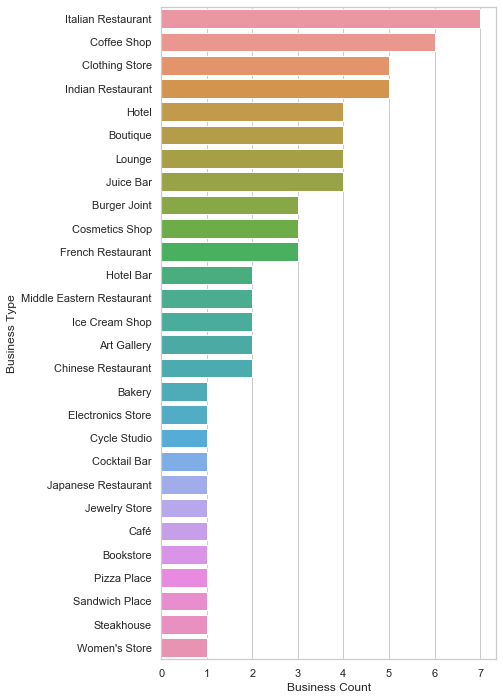

In [47]:
Cluster_1 = pd.DataFrame(city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 0, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]])
columnNames = ['Business Type']

Cluster_1_count = pd.DataFrame(columns = columnNames)
Cluster_1_count['Business Type'] = pd.concat([Cluster_1['1st Most Common Venue'], Cluster_1['2nd Most Common Venue'], Cluster_1['3rd Most Common Venue'],
                                             Cluster_1['4th Most Common Venue'], Cluster_1['5th Most Common Venue'], Cluster_1['6th Most Common Venue'], 
                                             Cluster_1['7th Most Common Venue'], Cluster_1['8th Most Common Venue'], Cluster_1['9th Most Common Venue'], 
                                              Cluster_1['10th Most Common Venue']], axis =0, ignore_index =True)

Cluster_1_count['Business Count'] = 1
Cluster_1_count.shape


Cluster_1_count = Cluster_1_count.groupby(['Business Type'])['Business Count'].sum().reset_index()
Cluster_1_count = Cluster_1_count.sort_values(by=['Business Count'], ascending=False)

sns.set(style="whitegrid")
plt.subplots(figsize=(6, 12))
ax = sns.barplot(y = "Business Type", x = "Business Count", data=Cluster_1_count)


In [48]:
fig = ax.get_figure()
fig.savefig("LW_Explore_Cluster_1.png", bbox_inches = 'tight')

In [49]:
LW_Explore_Cluster_1 = set(Cluster_1['Neighborhood'])
print("Neighborhoods in Cluster 1 are: ", LW_Explore_Cluster_1)

Neighborhoods in Cluster 1 are:  {'Mayfair (south), Piccadilly', 'Harley Street', 'Mayfair (north), Grosvenor Square', 'Marylebone', 'Mayfair (east), Hanover Square, Savile Row, Royal Academy', 'Oxford Street (west)'}


In [50]:
# Cluster 2
city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 1, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]]


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,"St Mary Axe, Aldgate",1,Hotel,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Restaurant,Salad Place,Pub,English Restaurant,Asian Restaurant,Breakfast Spot
10,"Lloyd's of London, Fenchurch Street",1,Hotel,Gym / Fitness Center,Pub,Restaurant,Cocktail Bar,Salad Place,Coffee Shop,Garden,English Restaurant,Italian Restaurant
11,"Tower Hill, Tower of London",1,Hotel,Pub,Gym / Fitness Center,Indian Restaurant,French Restaurant,Café,Sandwich Place,Castle,Restaurant,Cocktail Bar
12,"Monument, Billingsgate",1,Hotel,Gym / Fitness Center,Scenic Lookout,Pub,French Restaurant,Garden,Hotel Bar,Coffee Shop,History Museum,Restaurant


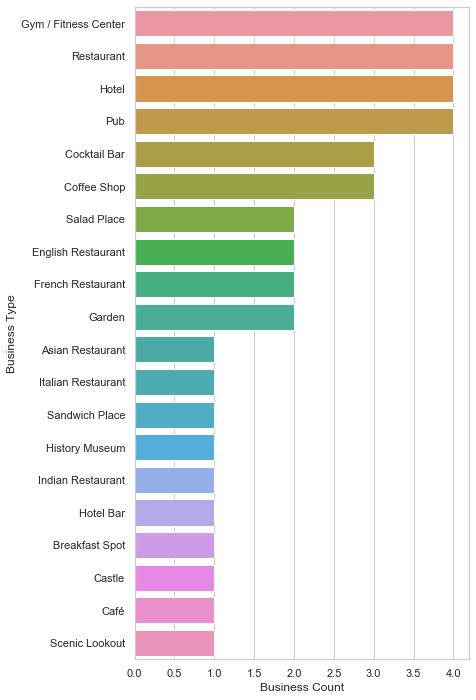

In [51]:
Cluster_2 = pd.DataFrame(city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 1, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]])
columnNames = ['Business Type']

Cluster_2_count = pd.DataFrame(columns = columnNames)
Cluster_2_count['Business Type'] = pd.concat([Cluster_2['1st Most Common Venue'], Cluster_2['2nd Most Common Venue'], Cluster_2['3rd Most Common Venue'],
                                             Cluster_2['4th Most Common Venue'], Cluster_2['5th Most Common Venue'], Cluster_2['6th Most Common Venue'], 
                                             Cluster_2['7th Most Common Venue'], Cluster_2['8th Most Common Venue'], Cluster_2['9th Most Common Venue'], 
                                              Cluster_2['10th Most Common Venue']], axis =0, ignore_index =True)

Cluster_2_count['Business Count'] = 1
Cluster_2_count.shape


Cluster_2_count = Cluster_2_count.groupby(['Business Type'])['Business Count'].sum().reset_index()
Cluster_2_count = Cluster_2_count.sort_values(by=['Business Count'], ascending=False)

sns.set(style="whitegrid")
plt.subplots(figsize=(6, 12))
ax = sns.barplot(y = "Business Type", x = "Business Count", data=Cluster_2_count)


In [52]:
fig = ax.get_figure()
fig.savefig("LW_Explore_Cluster_2.png", bbox_inches = 'tight')

In [53]:
LW_Explore_Cluster_2 = set(Cluster_2['Neighborhood'])
print("Neighborhoods in Cluster 2 are: ", LW_Explore_Cluster_2)

Neighborhoods in Cluster 2 are:  {"Lloyd's of London, Fenchurch Street", 'Monument, Billingsgate', 'St Mary Axe, Aldgate', 'Tower Hill, Tower of London'}


In [54]:
# Cluster 3
city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 2, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]]


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,"Drury Lane, Kingsway, Aldwych",2,Theater,Hotel,Restaurant,Dessert Shop,Burger Joint,Coffee Shop,Clothing Store,Pub,Cosmetics Shop,Museum
28,Covent Garden,2,Theater,Coffee Shop,Ice Cream Shop,Bakery,Indian Restaurant,Café,Dessert Shop,Clothing Store,Gym,Gift Shop
29,"Leicester Square, St. Giles",2,Theater,Coffee Shop,Ice Cream Shop,Bakery,Cocktail Bar,Lounge,Hotel,Italian Restaurant,Peruvian Restaurant,Steakhouse
30,Charing Cross,2,Theater,Coffee Shop,Bakery,Ice Cream Shop,Pub,French Restaurant,Café,Speakeasy,Italian Restaurant,Lounge
31,"Somerset House, Temple (west)",2,Theater,Hotel,Cocktail Bar,Coffee Shop,Bakery,Ice Cream Shop,Dessert Shop,Burger Joint,Italian Restaurant,French Restaurant
42,All but the west of St James's,2,Theater,Hotel,Bookstore,Art Gallery,Seafood Restaurant,Ice Cream Shop,Italian Restaurant,Lounge,Indian Restaurant,Art Museum
46,"Soho (south east); Chinatown, Soho Square",2,Theater,Bakery,Ice Cream Shop,Coffee Shop,Hotel,Italian Restaurant,Japanese Restaurant,Lounge,Cocktail Bar,Burger Joint
47,Soho (north west),2,Cocktail Bar,Theater,Hotel,Coffee Shop,Steakhouse,Bakery,Seafood Restaurant,Italian Restaurant,Lounge,Dessert Shop


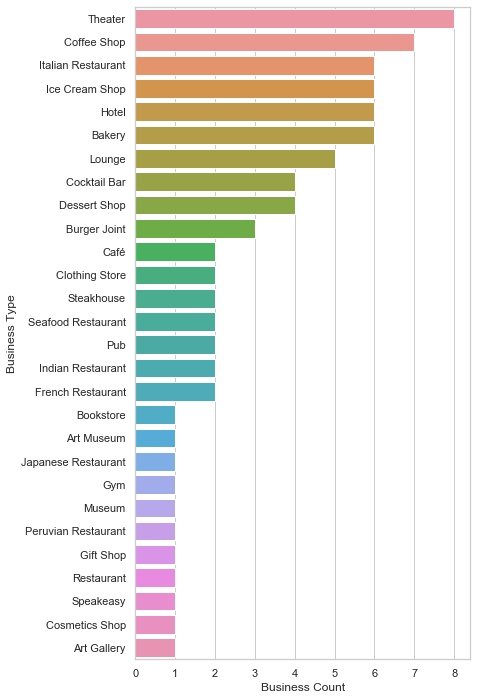

In [55]:
Cluster_3 = pd.DataFrame(city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 2, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]])
columnNames = ['Business Type']

Cluster_3_count = pd.DataFrame(columns = columnNames)
Cluster_3_count['Business Type'] = pd.concat([Cluster_3['1st Most Common Venue'], Cluster_3['2nd Most Common Venue'], Cluster_3['3rd Most Common Venue'],
                                             Cluster_3['4th Most Common Venue'], Cluster_3['5th Most Common Venue'], Cluster_3['6th Most Common Venue'], 
                                             Cluster_3['7th Most Common Venue'], Cluster_3['8th Most Common Venue'], Cluster_3['9th Most Common Venue'], 
                                              Cluster_3['10th Most Common Venue']], axis =0, ignore_index =True)

Cluster_3_count['Business Count'] = 1
Cluster_3_count.shape


Cluster_3_count = Cluster_3_count.groupby(['Business Type'])['Business Count'].sum().reset_index()
Cluster_3_count = Cluster_3_count.sort_values(by=['Business Count'], ascending=False)

sns.set(style="whitegrid")
plt.subplots(figsize=(6, 12))
ax = sns.barplot(y = "Business Type", x = "Business Count", data=Cluster_3_count)


In [56]:
fig = ax.get_figure()
fig.savefig("LW_Explore_Cluster_3.png", bbox_inches = 'tight')

In [57]:
LW_Explore_Cluster_3 = set(Cluster_3['Neighborhood'])
print("Neighborhoods in Cluster 3 are: ", LW_Explore_Cluster_3)

Neighborhoods in Cluster 3 are:  {'Soho (north west)', 'Soho (south east); Chinatown, Soho Square', 'Covent Garden', 'Leicester Square, St. Giles', "All but the west of St James's", 'Charing Cross', 'Drury Lane, Kingsway, Aldwych', 'Somerset House, Temple (west)'}


In [58]:
# Cluster 4
city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 3, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]]


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,"St John's Wood, Primrose Hill (south), Maryleb...",3,Café,Yoga Studio,Beer Garden,Garden,Boat or Ferry,French Restaurant,Middle Eastern Restaurant,Bus Stop,Caucasian Restaurant,Bakery
41,"Rest of Belgravia (north of Eaton Square), Kni...",3,Café,Hotel,Boutique,Plaza,Indian Restaurant,Restaurant,Gastropub,Italian Restaurant,Pub,Shoe Store
43,"South Kensington district: South Kensington, K...",3,Café,Science Museum,Exhibit,Italian Restaurant,Garden,Bar,Coffee Shop,Indian Restaurant,Polish Restaurant,Sandwich Place
44,"Portland Place, Regent Street",3,Café,Pub,Pizza Place,Art Gallery,Park,Tennis Court,Middle Eastern Restaurant,Music Venue,Breakfast Spot,Seafood Restaurant
55,"Paddington, Bayswater, Hyde Park, Westbourne G...",3,Café,Grocery Store,Pizza Place,Plaza,Hotel,Middle Eastern Restaurant,Pub,Bakery,Coffee Shop,Canal
56,"Maida Hill district: Maida Hill, Maida Vale, L...",3,Café,Pub,Coffee Shop,Seafood Restaurant,Restaurant,Hotel,Farmers Market,Garden Center,Garden,Korean Restaurant
57,"North Kensington, Kensal Town, Ladbroke Grove ...",3,Pub,Indian Restaurant,Café,Restaurant,Turkish Restaurant,Canal,Grocery Store,Italian Restaurant,Pizza Place,Portuguese Restaurant
58,"Notting Hill, Ladbroke Grove (south), Holland ...",3,Pub,Café,Gastropub,Beer Bar,Burger Joint,Fish & Chips Shop,Music Venue,Food & Drink Shop,Middle Eastern Restaurant,Ethiopian Restaurant


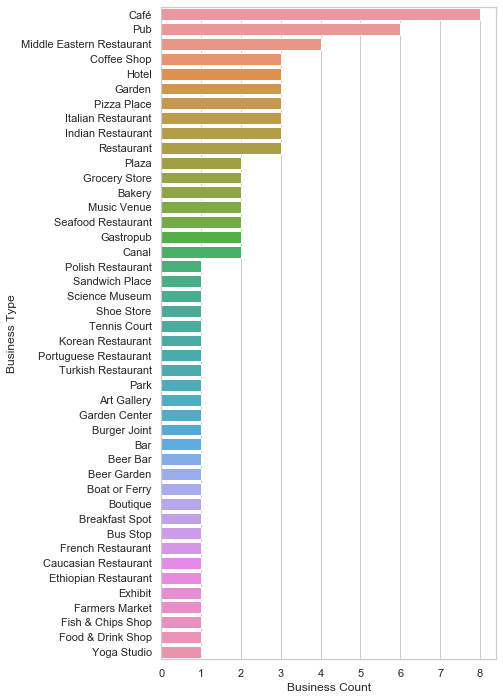

In [59]:
Cluster_4 = pd.DataFrame(city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 3, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]])
columnNames = ['Business Type']

Cluster_4_count = pd.DataFrame(columns = columnNames)
Cluster_4_count['Business Type'] = pd.concat([Cluster_4['1st Most Common Venue'], Cluster_4['2nd Most Common Venue'], Cluster_4['3rd Most Common Venue'],
                                             Cluster_4['4th Most Common Venue'], Cluster_4['5th Most Common Venue'], Cluster_4['6th Most Common Venue'], 
                                             Cluster_4['7th Most Common Venue'], Cluster_4['8th Most Common Venue'], Cluster_4['9th Most Common Venue'], 
                                              Cluster_4['10th Most Common Venue']], axis =0, ignore_index =True)

Cluster_4_count['Business Count'] = 1
Cluster_4_count.shape


Cluster_4_count = Cluster_4_count.groupby(['Business Type'])['Business Count'].sum().reset_index()
Cluster_4_count = Cluster_4_count.sort_values(by=['Business Count'], ascending=False)

sns.set(style="whitegrid")
plt.subplots(figsize=(6, 12))
ax = sns.barplot(y = "Business Type", x = "Business Count", data=Cluster_4_count)


In [60]:
fig = ax.get_figure()
fig.savefig("LW_Explore_Cluster_4.png", bbox_inches = 'tight')

In [61]:
LW_Explore_Cluster_4 = set(Cluster_4['Neighborhood'])
print("Neighborhoods in Cluster 4 are: ", LW_Explore_Cluster_4)

Neighborhoods in Cluster 4 are:  {"St John's Wood, Primrose Hill (south), Marylebone (north), Lisson Grove (north)", 'Maida Hill district: Maida Hill, Maida Vale, Little Venice (part)', 'South Kensington district: South Kensington, Knightsbridge (part)', "North Kensington, Kensal Town, Ladbroke Grove (north), Queen's Park (part)", 'Notting Hill, Ladbroke Grove (south), Holland Park (part)', 'Rest of Belgravia (north of Eaton Square), Knightsbridge (eastern half) and Chelsea (a corner)', 'Paddington, Bayswater, Hyde Park, Westbourne Green, Little Venice (part), Notting Hill (part)', 'Portland Place, Regent Street'}


In [62]:
# Cluster 5
city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 4, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]]


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St Bartholomew's Hospital,4,Italian Restaurant,Gym / Fitness Center,Wine Bar,Coffee Shop,Sandwich Place,Plaza,Burrito Place,Art Gallery,Sushi Restaurant,Café
1,"Clerkenwell, Farringdon",4,Pub,Café,Coffee Shop,Gym / Fitness Center,Vietnamese Restaurant,Hotel,Italian Restaurant,Modern European Restaurant,French Restaurant,Plaza
2,Hatton Garden,4,Pub,Coffee Shop,Hotel,Italian Restaurant,Cocktail Bar,Sushi Restaurant,Bar,Restaurant,Wine Bar,Steakhouse
3,"St Luke's, Bunhill Fields",4,Coffee Shop,Bar,Gym / Fitness Center,Food Truck,Hotel,Italian Restaurant,Gastropub,Yoga Studio,Indie Movie Theater,Concert Hall
4,Shoreditch,4,Coffee Shop,Hotel,Italian Restaurant,Restaurant,Bar,Pizza Place,Gym / Fitness Center,Pub,Food Truck,Steakhouse
5,"Old Broad Street, Tower 42",4,Coffee Shop,Cocktail Bar,Restaurant,Hotel,Indian Restaurant,Pub,Pizza Place,Gym / Fitness Center,Salad Place,Burger Joint
6,Bank of England,4,Coffee Shop,Restaurant,Hotel,Sushi Restaurant,Gym / Fitness Center,French Restaurant,Wine Bar,Café,Cocktail Bar,Italian Restaurant
7,Guildhall,4,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Restaurant,Hotel,Steakhouse,French Restaurant,Seafood Restaurant,Wine Bar,Cocktail Bar
8,Barbican,4,Coffee Shop,Gym / Fitness Center,Hotel,Deli / Bodega,Food Truck,Sandwich Place,Bar,Italian Restaurant,Art Gallery,Indie Movie Theater
13,"Cornhill, Gracechurch Street, Lombard Street",4,Restaurant,Gym / Fitness Center,Hotel,Coffee Shop,Cocktail Bar,Sandwich Place,Steakhouse,French Restaurant,English Restaurant,Salad Place


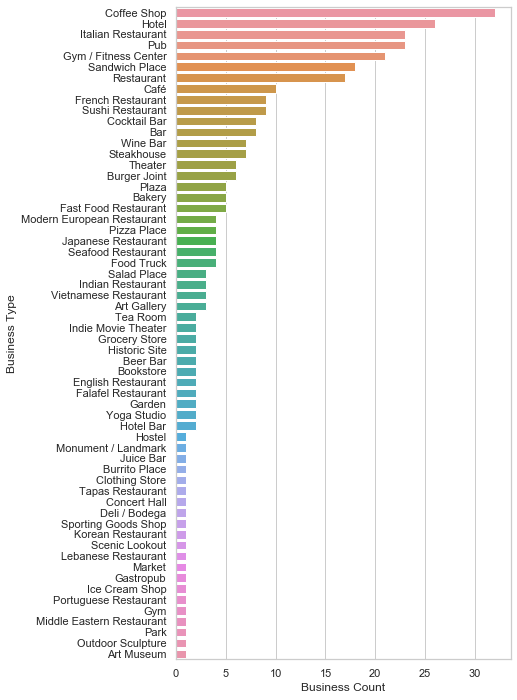

In [63]:
Cluster_5 = pd.DataFrame(city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 4, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]])
columnNames = ['Business Type']

Cluster_5_count = pd.DataFrame(columns = columnNames)
Cluster_5_count['Business Type'] = pd.concat([Cluster_5['1st Most Common Venue'], Cluster_5['2nd Most Common Venue'], Cluster_5['3rd Most Common Venue'],
                                             Cluster_5['4th Most Common Venue'], Cluster_5['5th Most Common Venue'], Cluster_5['6th Most Common Venue'], 
                                             Cluster_5['7th Most Common Venue'], Cluster_5['8th Most Common Venue'], Cluster_5['9th Most Common Venue'], 
                                              Cluster_5['10th Most Common Venue']], axis =0, ignore_index =True)

Cluster_5_count['Business Count'] = 1
Cluster_5_count.shape


Cluster_5_count = Cluster_5_count.groupby(['Business Type'])['Business Count'].sum().reset_index()
Cluster_5_count = Cluster_5_count.sort_values(by=['Business Count'], ascending=False)

sns.set(style="whitegrid")
plt.subplots(figsize=(6, 12))
ax = sns.barplot(y = "Business Type", x = "Business Count", data=Cluster_5_count)


In [64]:
fig = ax.get_figure()
fig.savefig("LW_Explore_Cluster_5.png", bbox_inches = 'tight')

In [65]:
LW_Explore_Cluster_5 = set(Cluster_5['Neighborhood'])
print("Neighborhoods in Cluster 5 are: ", LW_Explore_Cluster_5)

Neighborhoods in Cluster 5 are:  {'Guildhall', 'Shoreditch', 'Cornhill, Gracechurch Street, Lombard Street', 'Great Portland Street, Fitzrovia', 'Barbican', 'Parliament Square, Nearby Westminster School to Westminster Cathedral to CCAL, University of the Arts, London', 'Cannon Street', 'Bankside, South Bank, Southwark', 'Fetter Lane', "Whitehall, Buckingham Palace, the Houses of Parliament and west of St James's", 'Whitechapel, Spitalfields, Shadwell, Limehouse, Stepney, Portsoken', "St Paul's", 'South or lower Belgravia and Chelsea, from Sloane Square to Victoria Station to Grosvenor Waterside basin', "Kilburn, Brondesbury, West Hampstead, Queen's Park", 'Mansion House', 'Clerkenwell, Farringdon', "Northern 'Victoria' around Buckingham Gate ", 'Temple', "Lincoln's Inn Fields, Royal Courts of Justice, Chancery Lane", "St Bartholomew's Hospital", 'Hatton Garden', 'Old Broad Street, Tower 42', "Broadway, Queen Anne's Gate and Old Queen Street ", 'High Holborn', "Euston, Regent's Park, Ba